### Week 6 Assignment - PFDA
##### Author: E. Qejvani

#### _Task:_

This program read a .csv file 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv' and plots:

- The temperature
- The mean temperature each day
- The mean temperature for each month
- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds 

In [50]:
# Importing all libraries needed for the project

import pandas as pd  
import matplotlib.pyplot as plt       

In [51]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=22, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [52]:
# Checking information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    247674 non-null  object 
 1   ind     247674 non-null  int64  
 2   rain    247674 non-null  object 
 3   ind.1   247674 non-null  int64  
 4   temp    247674 non-null  float64
 5   ind.2   247674 non-null  int64  
 6   wetb    247674 non-null  float64
 7   dewpt   247674 non-null  float64
 8   vappr   247674 non-null  float64
 9   rhum    247674 non-null  int64  
 10  msl     247674 non-null  object 
 11  ind.3   247674 non-null  int64  
 12  wdsp    247674 non-null  object 
 13  ind.4   247674 non-null  int64  
 14  wddir   247674 non-null  object 
 15  ww      247674 non-null  object 
 16  w       247674 non-null  object 
 17  sun     247674 non-null  float64
 18  vis     247674 non-null  object 
 19  clht    247674 non-null  object 
 20  clamt   247674 non-null  object 
dtypes: float64

In [53]:
# Change date datatype from object to datetime format. Command 'errors='coerce'' handles any invalid dates by converting them to NaT (not a time).
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.info()

C:\Users\ermel\AppData\Local\Temp\ipykernel_54496\3859216260.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    247674 non-null  datetime64[ns]
 1   ind     247674 non-null  int64         
 2   rain    247674 non-null  object        
 3   ind.1   247674 non-null  int64         
 4   temp    247674 non-null  float64       
 5   ind.2   247674 non-null  int64         
 6   wetb    247674 non-null  float64       
 7   dewpt   247674 non-null  float64       
 8   vappr   247674 non-null  float64       
 9   rhum    247674 non-null  int64         
 10  msl     247674 non-null  object        
 11  ind.3   247674 non-null  int64         
 12  wdsp    247674 non-null  object        
 13  ind.4   247674 non-null  int64         
 14  wddir   247674 non-null  object        
 15  ww      247674 non-null  object        
 16  w       247674 non-null  object        
 17  sun     247674 non-null  floa

In [54]:
# Drop any rows with invalid dates, if necessary
df = df.dropna(subset=['date'])
# Calculate the daily median temperature
# daily_median = df.groupby('date')['temp'].median()


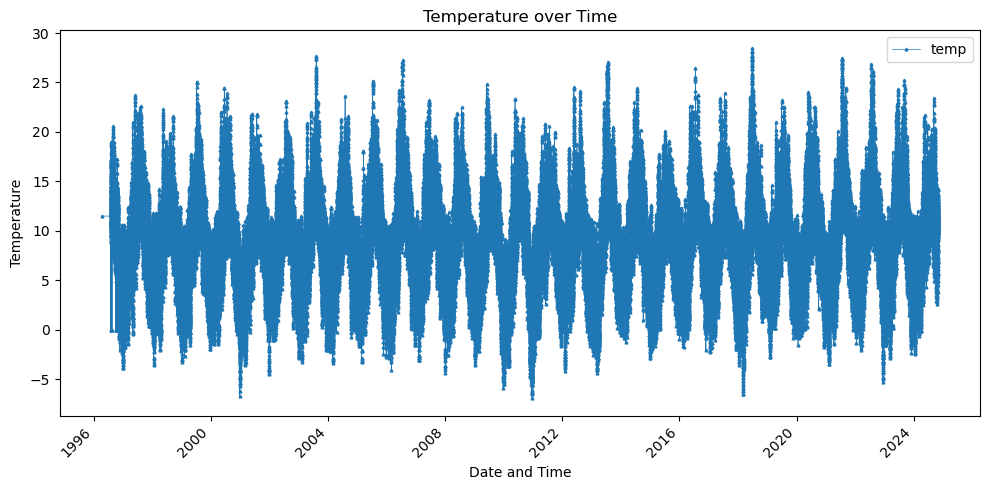

In [55]:
# Set 'Date' as the index for better datetime plotting
df.set_index('date', inplace=True)

# Plot the data with pandas plot using kind='line'
df.plot(y='temp', kind='line', figsize=(10, 5), marker='^', linestyle='-', linewidth=0.5, markersize=2)
plt.xlabel('Date and Time')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()